Master 2 MLDS - Paris Descartes

AZAP Serkan

TABET DERRAZ Ikram

Projet Text mining

mai 2018

In [ ]:
# executer 1 fois
#nltk.download('inaugural')
#nltk.download('brown')
#nltk.download('semcor')

## librairies

In [1]:
import nltk
from nltk.corpus import inaugural
from nltk.corpus import brown
from nltk.corpus import semcor
import gensim
from gensim.models import word2vec
import random
import numpy as np
import pandas as pd
import string
import datetime
from gensim.models import Word2Vec
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

%matplotlib inline
#random.seed(123)
#np.random.seed(123) 

c:\users\serks\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## importation du corpus

In [2]:
#inaugural.fileids()

corpus = inaugural
#corpus = brown
#corpus = semcor

## récupération de tous les mots dans les documents du corpus

In [3]:
corpusWords = []
for text in corpus.fileids():
    corpusWords.extend(corpus.words(text))

len(corpusWords)


145735

In [4]:
counts = Counter(corpusWords)
print(counts)
print()
print(len(counts))

Counter({'the': 9281, 'of': 6970, ',': 6840, 'and': 4991, '.': 4676, 'to': 4311, 'in': 2527, 'a': 2134, 'our': 1905, 'that': 1688, 'be': 1460, 'is': 1403, 'we': 1141, 'for': 1075, 'by': 1036, 'it': 1011, 'which': 1002, 'have': 994, 'not': 916, 'as': 888, 'with': 886, 'will': 846, 'I': 831, 'are': 774, 'all': 758, 'their': 719, 'this': 700, 'The': 619, 'has': 611, 'people': 559, 'its': 554, ';': 544, 'or': 537, 'from': 521, 'on': 496, 'We': 483, 'been': 482, 'but': 479, 'can': 457, 'us': 455, 'my': 449, 'no': 406, 'an': 377, '--': 363, 'upon': 363, 'who': 356, 'It': 356, 'so': 354, 'must': 345, 'they': 341, 'Government': 331, 'them': 327, 'States': 325, 'should': 318, 'may': 316, 'at': 316, 'great': 312, 'world': 312, 'shall': 310, 'more': 302, 'country': 296, 'those': 296, '-': 280, 'every': 272, 'any': 269, 'was': 268, 'government': 260, 'other': 253, 'own': 245, 'peace': 244, 'nation': 235, 'than': 234, 'only': 231, 'citizens': 230, 'new': 227, 'one': 226, 'power': 226, 'In': 222, 'p

## nettoyage

In [5]:
corpusWords = [i for i in corpusWords if i not in ["the",
                                                  "of",
                                                   "and",
                                                   "to",
                                                   "in",
                                                   "a",
                                                   "our",
                                                   "that",
                                                   "be",
                                                   "is",
                                                   "we",
                                                   "for",
                                                   "by",
                                                   "it",
                                                   "which",
                                                   "have",
                                                   "not",
                                                   "as",
                                                   "with",
                                                   "will",
                                                   "I",
                                                   "are",
                                                   "all"
                                                   "their",
                                                   "this",
                                                   "The",
                                                   "has",
                                                   "its",
                                                   "or",
                                                   "from",
                                                   "on",
                                                   "We",
                                                   "been",
                                                   "but",
                                                   "can"]]
print( len(corpusWords) )

corpusWords = [i for i in corpusWords if i not in string.punctuation ]
print( len(corpusWords) )

for i, s in enumerate(corpusWords):
    if (s[:1]=="X"):
        print(s, end=", ")
        corpusWords[i] = s[1:]
print()
print( len(corpusWords) )

corpusWords = [i for i in corpusWords if i not in ["¡",
                                                   "--",
                                                   "¦",
                                                   '."',
                                                   " s ",
                                                   "...",
                                                   "....",
                                                   ',"',
                                                   '?"',
                                                   "¡¦",
                                                   ".¡¨",
                                                   "¡¨¡",
                                                   "¡§"]]
print( len(corpusWords) )


91726
78742
Xand, Xand, Xprone, Xviolence, Xthough, Xa, Xin, Xand, Xand, Xthe, Xpreparing, Xon, Xideals, Xand, Xthey, Xtested, Xwe, 
78742
78243


## verification liste de mots

In [6]:
textFile = open('mot_corpus.txt', 'w')

for word in corpusWords:
    textFile.write("%s " % word)

# importation du modèle word2vec GoogleNews

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('D:/Documents/Fac/M2/TextMining/Projet/GoogleNews-vectors-negative300.bin', binary=True)
type(model)


# importation du modèle text8

In [7]:
#sentences = word2vec.Text8Corpus("text8")
#model = word2vec.Word2Vec(sentences, size=300, window=12, negative=12)

sentences = word2vec.Word2Vec.load("text8_size200_window14_negative12_sg_1.model")
print( type(sentences) ) 

#model = model.wv
model = sentences.wv
print( type(model) )




<class 'gensim.models.word2vec.Word2Vec'>
<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


# importation du modèle glove.840B.300d

In [ ]:
# conversion du modele glove en word2vec
gensim.scripts.glove2word2vec.glove2word2vec("glove.840B.300d.txt", 'glove.txt')
# Charger le nouveau fichier qui constitue un modele
model = gensim.models.KeyedVectors.load_word2vec_format('glove.txt')
print( type(model) )

In [ ]:
width = 10
height = 10
plt.figure(figsize=(width, height))

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
X = X[:200]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.text(s=word, x=result[i, 0], y=result[i, 1], fontsize=8, ha="center", va="bottom")
plt.show()

## fenetre pour SUB

In [8]:
nbWordNearby = 2

## récupération des 100 mots de façon aléatoire 

In [9]:
j = 0
VectWords = []
VectNearbyWords = []

while j < 100:
    index = random.randint(nbWordNearby+nbWordNearby, len(corpusWords)-nbWordNearby-1)
    word = corpusWords[index]

    wordIndexes = []
    for i,e in enumerate(corpusWords):
        if e == word:
            wordIndexes.append(i)

    try: # vreif si tout les mot environant sont dans le model
        nearbyWords = []
        for ind in wordIndexes: 
            nearbyWords.append([corpusWords[i] for i in list(range(ind-nbWordNearby,ind))+list(range(ind+1,ind+nbWordNearby+1))])
        nearbyWords = [_ for sublist in nearbyWords for _ in sublist]
        nearbyWords = list(set(nearbyWords))
    except IndexError:
        continue
    else:
    
        if ( (word not in VectWords) ): # verif si mot pas deja tiré
            if (word in model.wv.vocab):  # verif si mot present dans model

                exist=True
                for w in nearbyWords: # verif si les mots environ sont present dans embeding
                    try:
                        model[w]
                    except KeyError:
                        exist = False

                if(exist):
                    VectWords.append(corpusWords[index])
                    VectNearbyWords.append([ corpusWords[i] for i in range(index-nbWordNearby, index+nbWordNearby+1)])
                    j +=1


c:\users\serks\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


## les 100 mots choisi

In [10]:
VectWords


['bare',
 'hardy',
 'glad',
 'spheres',
 'attachments',
 'embody',
 'vessel',
 'adjust',
 'futility',
 'fleeting',
 'prompt',
 'invective',
 'obnoxious',
 'appreciation',
 'naturally',
 'fire',
 'concrete',
 'indicates',
 'ruthlessly',
 'disciplined',
 'kings',
 'seven',
 'morality',
 'uncontrolled',
 'joint',
 'unrestricted',
 'consisting',
 'hospitable',
 'chances',
 'clarified',
 'resumption',
 'binding',
 'ruinous',
 'recommends',
 'pitching',
 'emphasis',
 'colors',
 'valleys',
 'impassioned',
 'manifestations',
 'tracts',
 'needless',
 'intimate',
 'dictators',
 'alarmed',
 'averted',
 'clean',
 'resident',
 'thousand',
 'dramatic',
 'enabled',
 'culture',
 'diligence',
 'quality',
 'gaping',
 'respectful',
 'developments',
 'hearted',
 'calculating',
 'sort',
 'providential',
 'sit',
 'imposing',
 'artillery',
 'rightly',
 'constructive',
 'unforeseen',
 'infringed',
 'avoidance',
 'protective',
 'discoveries',
 'rate',
 'diverted',
 'mass',
 'stretching',
 'contribute',
 'refug

## contexte des 100 mots choisi

In [11]:
VectNearbyWords


[['at', 'fault', 'bare', 'reference', 'single'],
 ['furnishing', 'them', 'hardy', 'independent', 'race'],
 ['peace', 'am', 'glad', 'advised', 'recent'],
 ['their', 'separate', 'spheres', 'wise', 'partition'],
 ['there', 'dangerous', 'attachments', 'one', 'foreign'],
 ['because', 'they', 'embody', 'spirit', 'service'],
 ['steer', 'safety', 'vessel', 'all', 'embarked'],
 ['still', 'competent', 'adjust', 'best', 'way'],
 ['alike', 'dictate', 'futility', 'appeasement', 'shall'],
 ['moment', 'history', 'fleeting', 'time', 'precious'],
 ['strongest', 'incentive', 'prompt', 'conservative', 'precaution'],
 ['merely', 'forum', 'invective', 'strengthen', 'shield'],
 ['repeal', 'bad', 'obnoxious', 'laws', 'so'],
 ['duty', 'just', 'appreciation', 'every', 'circumstance'],
 ['my', 'attention', 'naturally', 'drawn', 'great'],
 ['preservation', 'sacred', 'fire', 'liberty', 'destiny'],
 ['day', 'today', 'concrete', 'expression', 'stunning'],
 ['at', 'last', 'indicates', 'day', 'deliverance'],
 ['upon'

## fonctions pour le calcule du SUB

In [12]:
wordsMeans = {}

for word in VectWords:
    #print("___word: ", word)

    #trouver ttes les occurance du mot dans le corpus
    #print('___occurance du mot dans le corpus')
    wordIndexes = []
    for i,e in enumerate(corpusWords):
        if e == word:
            wordIndexes.append(i)
    #print("__indexes: ", wordIndexes)


    #recuperation du/des vecteur(s) de mot entourant le mot
    #print("___vecteur(s) de mot entourant le mot")
    wordNearbyWords = []
    for index in wordIndexes:
        wordNearbyWords.append([corpusWords[i] for i in list(range(index-nbWordNearby,index+nbWordNearby+1))])
    #print("_len: ", len(wordNearbyWords) )
    #print("_wordValueVect: ", wordNearbyWords)


    #recuperation du/des vecteur(s) de valeur de mot entourant le mot
    #print("___vecteur(s) de valeur de mot entourant le mot")
    wordNearbyVect = []
    for index in wordIndexes:
        wordNearbyVect.append([model[corpusWords[i]].tolist() for i in list(range(index-nbWordNearby,index))+list(range(index+1,index+nbWordNearby+1))])
    #print("_len: ", len(wordNearbyVect) )
    #print("wordNearbyVect: ", wordNearbyVect)


    #moyenne des vecteurs de mot entourant le mot si il apparait plusieur fois dans le corpus
    #print("___moyenne des vecteurs de mot entourant le mot si il apparait plusieur fois dans le corpus")
    if ( len(wordNearbyVect) > 1 ):
        wordNearbyVect = np.mean(wordNearbyVect, axis=0)
        #print( len(wordNearbyVect) )
        #print(wordNearbyVect)
    else:
        wordNearbyVect = wordNearbyVect[0]
        #print("_mean vect, ", wordNearbyVect)


    #moyenne du vecteur entourant le mot
    #print("___moyenne du vecteur entourant le mot")
    wordMean = np.mean(wordNearbyVect, axis=0)
    #print("_wordMean, ", wordMean)
    #print("----")

    wordsMeans[word] = wordMean

## valeurs calculées

In [13]:
wordsMeans

{'abstaining': array([-0.13109742, -0.11384063,  0.02054089, -0.04839096, -0.16555569,
        -0.06964795,  0.14727195,  0.32985959, -0.06807676,  0.09881364,
        -0.13718419,  0.22518503, -0.15709112,  0.34527945, -0.10722464,
         0.07985656,  0.04006108, -0.25858147,  0.0596998 , -0.15475931,
         0.10037947,  0.04463033,  0.03316178,  0.11909393,  0.25308115,
        -0.06819268, -0.24583193, -0.18528694,  0.14529886, -0.03449353,
         0.14359605,  0.09359943,  0.20747739, -0.07393809,  0.17717413,
        -0.1115849 , -0.01537666,  0.21221232,  0.23196832,  0.16814473,
         0.19468279, -0.26202629,  0.22882778,  0.02975989,  0.00890345,
        -0.01756802,  0.12594596, -0.21953866, -0.249006  , -0.01399707,
        -0.23936198,  0.09118572,  0.45180556, -0.05906467,  0.25988311,
         0.19552383,  0.17610894, -0.06186324, -0.13362673, -0.25031671,
         0.07878074, -0.02900974, -0.13491934,  0.09664251,  0.26567264,
        -0.23859768,  0.09348954, -0.

## récuperation des représentations originales

In [14]:
DictOrig = {}
for word in VectWords:
     #print(word)
    wordVectValues = [] #vecteur de mots correspondant au mot OOV
    #wordVectValues = model[word]
    wordVectValues = model.word_vec(word)
    if word not in DictOrig.keys():
        DictOrig[word] = wordVectValues


## valeurs originales

In [15]:
DictOrig


{'abstaining': array([ 0.18596536,  0.11396512,  0.26043248,  0.12485745, -0.20682624,
         0.01635878,  0.28027913,  0.19516475, -0.06550086,  0.46828258,
        -0.03800609, -0.02860589,  0.12023901,  0.33534226, -0.11349577,
         0.1246023 , -0.00706336,  0.13070218,  0.17486458, -0.02188399,
         0.10123803,  0.03266918, -0.26180005, -0.05344637, -0.31157216,
        -0.0532546 , -0.2276625 ,  0.15453586, -0.11450936,  0.09537767,
         0.13013954,  0.08039246,  0.38754758,  0.3794783 , -0.02817945,
        -0.23559831,  0.20398434,  0.07764229,  0.37323684,  0.34417483,
         0.21353398, -0.06592844,  0.5122833 , -0.20191322,  0.04152384,
        -0.06121219, -0.02627053, -0.06942078, -0.07292649,  0.03285571,
        -0.14096166,  0.28324923, -0.15153953, -0.00654134, -0.16895662,
        -0.00103119,  0.17585738, -0.0373195 , -0.15230557, -0.12198523,
        -0.17664957,  0.11162601, -0.20687623, -0.16732132, -0.01035037,
         0.07122477, -0.09393104,  0.

## calcul similarité cosinus entre 2 vecteur de valeur pour un mot

In [16]:
def my_cosine_similarity(wordVect1, wordVect2):
    dot = np.dot( wordVect1, wordVect2 )
    val = ( np.linalg.norm(wordVect1) *  np.linalg.norm(wordVect2) )
    return dot / val


## similarité cosinus entre les représentations calculées avec SUB et les représentations originales

In [17]:
listCosValues = []
for word in VectWords:
    print(word, end=":  ")
    wordVect1 = wordsMeans.get(word)
    wordVect2 = DictOrig.get(word)
    cosVal = my_cosine_similarity(wordVect1, wordVect2)
    print(cosVal)
    listCosValues.append(cosVal)


bare:  0.3068126309065543
hardy:  0.3470025642895209
glad:  0.5384188565086643
spheres:  0.43002854386891814
attachments:  0.530731248293478
embody:  0.5902497302196773
vessel:  0.4209795242846237
adjust:  0.4440421135061916
futility:  0.5914195164786455
fleeting:  0.5136521555268051
prompt:  0.4443778648829959
invective:  0.5099124013797809
obnoxious:  0.6205613701283736
appreciation:  0.4426222771960387
naturally:  0.44063679879902784
fire:  0.5912523717057079
concrete:  0.3183805930094568
indicates:  0.47635802122764453
ruthlessly:  0.44938769986294674
disciplined:  0.6003201416835425
kings:  0.4857891007128846
seven:  0.5108092044607145
morality:  0.5201158464466469
uncontrolled:  0.35792324691698674
joint:  0.44900921829343593
unrestricted:  0.4365122409795595
consisting:  0.36427497428924294
hospitable:  0.399474144518403
chances:  0.4138721353336021
clarified:  0.3463980724806074
resumption:  0.5854485788444946
binding:  0.5429814373534015
ruinous:  0.6807284451583784
recommends

## valeur de similarité moyenne

In [18]:
np.mean(listCosValues)


0.4766047176216465

## enregistrement

In [19]:
import csv
from itertools import zip_longest
import itertools

def saveResult(calculatedVect, realVect, cosVect, Mean, filename):
    d = [calculatedVect, realVect, cosVect, Mean]
    export_data = zip_longest(*d, fillvalue = '')
    with open(filename, "a", newline='') as myfile:
        wr = csv.writer(myfile, delimiter =';')
        wr.writerow(("SUB", "Réel","Distance cos", "Moyenne"))
        wr.writerows(export_data)
    myfile.close()


In [20]:
# w: fenetre de la moyenne, default=2
filename = str("inaugural_text8_w1_"+datetime.datetime.now().strftime("%Y-%m-%d_%H.%M.%S")+".csv")
subRes = wordsMeans
reelRes = DictOrig
saveResult(subRes, reelRes,
           listCosValues,
           itertools.repeat(np.mean(listCosValues),len(listCosValues)),
           filename
          )

## variation du nombre de mots entourant l'oov

In [21]:
df1 = pd.DataFrame([0.15060739948350196,0.16804421501807082,0.17496677679635125,0.374098054830232,0.3256126283518196,0.189591774830657,0.03189976734702827,0.3335772056860828,0.0907830566154953,0.5118556238318968,0.08811385423721889,0.17209262034880143,0.3210566781556143,0.3749234739569874,0.17006256433776334,0.5925425333740787,0.4090285666994646,0.22621208949716112,0.49016801772199914,0.28935870238600536,0.2488250194024847,0.2916160657712485,0.41571793574153004,0.424420734608759,0.09028563870286747,0.4033688407206698,0.1651269346406637,0.47481003094960733,0.23941887008092005,0.1456789776212931,0.38365164896106635,0.24105328937480108,0.2826450666026068,0.2555897536222263,0.3240095779746845,0.34612207512392135,0.28038138334306884,0.06672673886340373,0.2656849453416256,0.16458751716532996,0.18909554867551065,0.36330321843198754,0.6247941488719488,0.4407464465530052,0.2898528425319534,0.34904954801110905,0.243067743652865,0.3136184446648625,0.362267173121941,0.33027439287419763,0.3618145460576962,0.3494936027723272,0.13518354839794697,0.2672890628680065,0.30796143068813253,0.27936682889225584,0.268221729499897,0.4301923303261598,0.486065296091901,0.18154768689022693,0.35849563190483097,0.25114632867913117,0.2799960535663779,0.3758687021548613,0.18468377583320733,0.2238446414969213,0.29308079013458754,0.24098084613799675,0.5111385390399875,0.38368163903057123,0.3453315529048823,0.1428682428588654,0.3293727791500556,0.42688254660365177,0.363556560212008,0.33106822660991114,0.48439742317588685,-0.010379389617584417,0.3867086760295158,0.40019829005234325,0.4343590973486875,0.22541788791159842,0.2740667243823556,0.5563318433163773,0.39107662563527457,0.47627813127067103,0.35312236235822725,0.33247464019834055,0.3233564151866007,0.5347439653066092,0.33709088643155205,0.2067222728522195,0.16203241272570804,0.418154803195942,0.1391297290783283,0.15424429398041264,0.06985098688157707,0.36604448262336864,0.20007622100942013,0.10402663529132344])
df2 = pd.DataFrame([0.1747264429270675,0.23827510490951764,0.2237237271169832,0.3708090301563214,0.43265127065515663,0.17878126728520063,0.0433238791948536,0.34717828998367084,0.17605619251411406,0.4877405330844344,0.2613933235243532,0.23346350837877386,0.3491576278824101,0.38374149359530785,0.3027374717699522,0.5263816451609128,0.4423362010758252,0.2348080936399691,0.45058606310780064,0.2832132669897617,0.2530139979326605,0.293372360680185,0.46001576772926805,0.4136654297722607,0.11694897505874563,0.39727998604582404,0.12551837882357963,0.4870146165924435,0.3023622122115227,0.17191147957624453,0.44069314686185623,0.26981653901081604,0.342805693776182,0.26974647817178127,0.29608081028409927,0.31949865032156693,0.3056050992246095,0.10883352853422619,0.26461140518658427,0.22905805146686575,0.25860659839366906,0.30777291953005703,0.45095716542894254,0.44455389703667925,0.26366573437195756,0.3073457099967447,0.3399767810663398,0.3262863410377275,0.35404821696620964,0.33050915434479033,0.2965895918151917,0.37350174873437497,0.19201083359588283,0.33411321270482025,0.2867783043562893,0.2347545363027136,0.32763163948205337,0.4723801130694238,0.48745606458308144,0.19663758573777387,0.36095132553841003,0.2853841296603196,0.32538871256223245,0.42290598449860267,0.24275361856447925,0.28705347717674107,0.2834115371204231,0.2519082473617797,0.476486603944727,0.3832308873192293,0.4423350569077027,0.1339842159347517,0.29662640090500414,0.3882274877735953,0.3628100355947389,0.3278455637204936,0.49088347022829965,0.08127730172608216,0.4155309970567728,0.3930429307602303,0.35916102561480534,0.28475657420053324,0.38008523456819804,0.4842418714423921,0.36505327028114476,0.4617579299381648,0.37104703253051186,0.4506410265828239,0.3367659099373512,0.4586104675230901,0.3067374594081807,0.19825017684863136,0.19175959092922387,0.352394467509992,0.121750804474,0.22471359351521722,0.1253142628094773,0.3711427116768197,0.26475135898069063,0.1393549662959838])
df3 = pd.DataFrame([0.19947124766350732,0.2503721321377702,0.33602130190636087,0.3700312542794057,0.45175261998403743,0.23234927353622198,0.05674846916636742,0.3363448540539979,0.19928212223870717,0.4692967223084974,0.27886476344443656,0.20746011835826378,0.347735576463291,0.38197700292614195,0.3703201858707204,0.4720151480793747,0.44628242842590476,0.2374747140560213,0.4450162909069088,0.26051132507825275,0.28437784819788237,0.2745895420940148,0.4952709614866872,0.4061735497689762,0.13555264884041363,0.3880410357884744,0.15799375349522624,0.480351086236883,0.32090635146556856,0.1836661332537492,0.43300743581987317,0.2620227170894854,0.3155546423704678,0.2673934418818834,0.30633300941863584,0.3324452587259858,0.3343989198708731,0.19602354976849531,0.27605567028213207,0.25032898670014186,0.2508014033130715,0.264560549217775,0.38596631333807496,0.41003143023943783,0.3058009033812745,0.27929701464368023,0.37263653411086095,0.29180796197162623,0.39227930427536095,0.3381794072266559,0.31092857154439685,0.38871151081317706,0.35738134801813737,0.32227543443402523,0.3097002063948937,0.23067191927062458,0.28740596504254456,0.46059818622262794,0.5179214579172432,0.29379425227146216,0.3748340421734279,0.2619843667313858,0.339192296098272,0.44644083993533235,0.2750401063289361,0.2715629228509191,0.2773420347929176,0.2437660351406846,0.455830681940153,0.3747479996219138,0.4204208952257059,0.1420041505490298,0.2922725211508099,0.3778454303893464,0.34867421060393544,0.33544611034468685,0.4725927087306696,0.098888041484981,0.42632769522798586,0.4575330812373875,0.34289348401943315,0.26460408277012315,0.3617841158221027,0.4730552878435819,0.3512891559695747,0.45356736437262807,0.3723086735327543,0.4148138806719266,0.3332710953350775,0.43461046441739626,0.26202579990888497,0.19297402680707706,0.2436440117441056,0.3549060259539276,0.180509311720796,0.2157638183730344,0.19227686593246338,0.37596626756240775,0.3030064094614273,0.15090711252112557])
df4 = pd.DataFrame([0.19802371487408926,0.25692253296005935,0.36150197233404774,0.3633241973680383,0.4698248525714046,0.2516068493980049,0.04599442757242934,0.3467065011006792,0.19659258734220592,0.46159975217277777,0.2572413805643896,0.22164839166434627,0.3369768862836039,0.3771059385597052,0.3830471769471659,0.43950437991024177,0.43681623855501633,0.25215366336414397,0.42899127121904224,0.26328966963956235,0.3157460296602729,0.2571223766356752,0.4708739529897268,0.4092090482849606,0.1571929564142295,0.38666886795514005,0.13625958347434378,0.4695948861345148,0.32818560676895625,0.20111697468733272,0.42083750562894,0.28947411434685194,0.32658527537431403,0.2663031155066973,0.3271158214424693,0.31688896495220253,0.3391791324684093,0.2167356882421273,0.2877732439517702,0.3155454447058253,0.2364955782914351,0.2563844390557726,0.33966707991159584,0.39363082601230065,0.334758746772804,0.2808202861601491,0.3632907322902876,0.2779207858263981,0.3862988166464211,0.33976275237538617,0.29928344383730365,0.3770903030870903,0.3264767754102149,0.32843631872619294,0.3218921870398288,0.21265927709812346,0.3087630596210841,0.4789437142123365,0.46147970775501845,0.2706946985517223,0.3742229595054575,0.2541509461891551,0.3337905551979446,0.44553645320979807,0.3008709352573123,0.28112619162433333,0.2747719332534875,0.2498870395681828,0.4518783630055426,0.3751084688177351,0.4154415155774689,0.17070085400664753,0.290243048042983,0.3418563801719598,0.34512486668480635,0.3171217414603841,0.4714526211259856,0.10705432242666654,0.4177134515495379,0.45647640831203146,0.3559623488744989,0.3176404435342705,0.38420765550620445,0.45467514612637405,0.3203790857443479,0.4550455649508387,0.36679493534464847,0.4402418480350099,0.312719330713464,0.4106907105477161,0.26393843230473596,0.24525519780886373,0.23739902208705704,0.371664891344181,0.1822960048820997,0.19368113475482782,0.19308515036843046,0.35829643555154606,0.31904406246701816,0.18109538409557904])


In [22]:
df1 = pd.DataFrame([0.5421765369385183,0.448829760506092,0.3828970450903251,0.43206492005956343,0.27855285531232843,0.48824126766073617,0.30920198560450507,0.5408352051343366,0.5706641310404965,0.28651906591546583,0.2784780591147944,0.6165869016771194,0.31419673171160956,0.5193467229114656,0.49451426128457027,0.32272192139703276,0.37162404638771906,0.2890155390530258,0.38568845519929484,0.46329825553333975,0.6465633775037453,0.23456091786527947,0.28777274351201887,0.3166263128861358,0.35765639839546043,0.5199138385567788,0.5090909678743925,0.4564361462706424,0.5503785781229651,0.4368704740002469,0.3764042680259208,0.4133580399955947,0.3081119714500574,0.2686062104682297,0.419493575582179,0.299991557664531,0.3211627411789899,0.43704103460281646,0.31707111407447247,0.4236481095446562,0.30244479517312944,0.5630578456336369,0.4219973561248884,0.34763953389676255,0.4302862250291636,0.4191771132579663,0.43300258038870626,0.6012189150431065,0.23289599188956903,0.4022851208688079,0.5021827276991301,0.543483029725304,0.33385325122956055,0.4144645516905714,0.2743809711638297,0.4166808113039513,0.2065621867749265,0.29882181716540723,0.46258578428134617,0.18083718036513674,0.37240089696498124,0.5362221581243515,0.35901440669912493,0.3559982995415914,0.2749867319913631,0.33123929498057,0.25658900190911477,0.582703102863326,0.15561348535669975,0.5364097267796191,0.42673863133129475,0.22060786314537836,0.5617890143281097,0.41848199229775923,0.479606270555593,0.38910392339967015,0.4358341265548579,0.3950491989985775,0.4330311011451521,0.3104283449565661,0.5272072242759215,0.3546203731448884,0.5318815310286238,0.32832563856155456,0.35753298716433046,0.2781711012126812,0.4232645446463995,0.42170317881205677,0.4498843778572137,0.3004492859562502,0.22131792923687882,0.30211332920389394,0.611853176720751,0.20224653626784544,0.4318226800975035,0.35114216256228803,0.27235009241434477,0.20969023757712169,0.4634978048427212,0.3645410057380009])
df2 = pd.DataFrame([0.5688301018326236,0.41415059062074155,0.3536520186181854,0.5467590732699956,0.29814267993047444,0.46958305856233035,0.2964806936997283,0.6464652404121483,0.5833810107629078,0.27536364825527937,0.3275486441143453,0.5840991742485171,0.45266935907908723,0.46294421397536684,0.4496071569959638,0.3894314755341001,0.4599598895874644,0.30619175168198975,0.43808419765039874,0.4913208139547445,0.7084197874963611,0.33075953510020734,0.3375893047832438,0.3837315843303434,0.3572954900461018,0.4923579239241161,0.5306222192409763,0.5000103477906527,0.5124991893374046,0.5371141086956077,0.38470502635704307,0.4896690426676908,0.38183976350775006,0.2913410349894511,0.4469048237441176,0.3378820537796096,0.3511242730793918,0.4878949443615783,0.36821663847934993,0.4150346692609323,0.41196198078848745,0.5593942264057638,0.47084670877718976,0.4304215229264463,0.4852108499526179,0.48670926871382797,0.48315279176774956,0.6356542208749909,0.3999343209955868,0.47225982973891967,0.5468117575893521,0.5861422662793229,0.33783073935395136,0.43502655613097024,0.36834389641092236,0.47068143705411797,0.382885450617583,0.3197901116542141,0.49010821317594766,0.1681035900231765,0.41779339480302535,0.6532211334108968,0.5216930370127622,0.377560920191569,0.26977169797207606,0.42046240546076946,0.2706392625899384,0.5613748690335293,0.2827228063185873,0.5347266923860469,0.537854344110726,0.2339014666548862,0.49952548088124754,0.45077458368576423,0.5201642028578414,0.3457978068127706,0.513709943055262,0.4797645690003574,0.4320553273404558,0.3957061883856633,0.5734383684083553,0.3542608996312234,0.573596730739715,0.3402367950677665,0.40326820976053473,0.3141324156885097,0.48211174548785557,0.43709265795867497,0.37462163639140833,0.5105607030897035,0.2550273958968275,0.36479982249282045,0.638461842791773,0.2232313886801126,0.5178734634547228,0.39772473653519036,0.41089114784181974,0.26036358946300586,0.5185841810881426,0.41947386550449195])
df3 = pd.DataFrame([0.5973554091221848,0.4755425633188114,0.3429983229414068,0.589102461455813,0.31792133709766535,0.44293039653257016,0.34729173106543293,0.6940676359206563,0.5682900857559199,0.37104809218663193,0.32727056170596497,0.5560829137765124,0.5422768970146232,0.4476238392533214,0.4613015580437641,0.4000260510776445,0.5684478262816808,0.2957735631620944,0.44685609974448753,0.4945208225837503,0.7590587238429346,0.3533626865841551,0.39963899386970736,0.41548137808012814,0.40706124395588084,0.49432918266559306,0.5735640752200444,0.5641539789412844,0.49449570943088544,0.6648050145967275,0.39226931192541514,0.5638563911674028,0.3617561672629595,0.34193485653562006,0.42361783629574334,0.3648580578363991,0.3541507810861624,0.4995412799199102,0.42524153976779155,0.4615651668553291,0.4701421583056956,0.6038310990346801,0.5019569329856137,0.5342428007138131,0.4660911512576264,0.4816383108754775,0.5096643005278817,0.6170809673263156,0.386352838640278,0.4789825727749492,0.5022594329689762,0.583362349851474,0.3042239640395484,0.46592052132890577,0.42762070823761517,0.463064491293826,0.3666784399460713,0.3975907766419227,0.45776362275652704,0.18078519365322246,0.42124291209880804,0.7045823727074311,0.5454103348636087,0.433707244914395,0.26232248171808964,0.44195885497968357,0.2611688580688492,0.5469085127060644,0.27318594177841804,0.5036782868568542,0.576160569776252,0.29287839170884705,0.4649094806684247,0.5175558845302469,0.5743416624303176,0.39115821305134263,0.5259383141987528,0.5210173677049174,0.4222935962698552,0.45847361898257494,0.6314897004799038,0.3596805478877976,0.5924610040942027,0.2926306430919364,0.3918301078146074,0.3256671822858521,0.5097254918264155,0.404710171222861,0.4666323225285319,0.46980410168503606,0.30407515145231623,0.36921016176595295,0.6315222000951516,0.38784436641990977,0.532586366101212,0.4261512869038159,0.4842486475505846,0.3016140606776171,0.5131914882603148,0.4970620504646863])
df4 = pd.DataFrame([0.6051451267623872,0.48413666534154587,0.5112093267890624,0.6074744845511452,0.36391803355528884,0.41331908622196084,0.4224905600279387,0.6770956505677385,0.5655572981176155,0.37954359228720247,0.35478780364329404,0.5092580393621438,0.5351598508592305,0.4421116802802703,0.4665732640074186,0.41702115876832585,0.5329147918774136,0.28339479607460505,0.4246330458404424,0.5048132215856826,0.7673796117598688,0.3549641614436269,0.41611641279068023,0.4123900473313379,0.4648090767326842,0.486387316291259,0.5903112720224186,0.5851844557021142,0.4639822710956478,0.6798578775545531,0.41255750069892283,0.6847453203020681,0.3446298497700159,0.3340329762573402,0.41173089765563037,0.4115071726865919,0.34307552606837505,0.5031949979494033,0.4441094446467792,0.4886080315405556,0.4652138915724626,0.6258951342626488,0.5086103785863466,0.5801485707901658,0.4946243753598677,0.49073611195779354,0.5117191816496895,0.5902393756055969,0.4770536645408412,0.47776287843497584,0.4949853504173577,0.5822328402037128,0.24357210167019963,0.467972601173631,0.40500970403750275,0.44613953852874055,0.4078745604241354,0.4222635856081962,0.48982588684798084,0.22892405202482008,0.40838754691374046,0.691687052116062,0.6104490466673392,0.46116682720346636,0.30531670450340936,0.4523113873026143,0.27941510273365167,0.5710609045248911,0.28199036017160395,0.5502418552095815,0.6031946288879697,0.2952640836759299,0.4510925375962208,0.5466358694152241,0.6067708994957582,0.4204656286104378,0.5271377456348215,0.5512824263194157,0.4453312304930963,0.4293062717170403,0.6244017949126139,0.4363522125198542,0.6053559938637139,0.3126695735538897,0.39568096668739133,0.34285950189464515,0.5323890167304767,0.46435805039276895,0.4689958516606869,0.4952827511489553,0.3171857482081588,0.39324674894265704,0.6321772349095377,0.46747707296691204,0.5030750175990363,0.39780236877268216,0.518665563920303,0.2989740492381547,0.5245677843312677,0.5582052270478501])


In [23]:
df = pd.concat([df1,df2,df3,df4],1)
df.columns = ["2 mots envorinnant", "4 mots envorinnant", "6 mots envorinnant", "8 mots envorinnant",]

df = df.sort_values(['4 mots envorinnant'], ascending=1)
df = df.reset_index(drop=True)
df

,2 mots envorinnant,4 mots envorinnant,6 mots envorinnant,8 mots envorinnant
0,0.180837,0.168104,0.180785,0.228924
1,0.202247,0.223231,0.387844,0.467477
2,0.220608,0.233901,0.292878,0.295264
3,0.221318,0.255027,0.304075,0.317186
4,0.209690,0.260364,0.301614,0.298974
5,0.274987,0.269772,0.262322,0.305317
6,0.256589,0.270639,0.261169,0.279415
7,0.286519,0.275364,0.371048,0.379544
8,0.155613,0.282723,0.273186,0.281990
9,0.268606,0.291341,0.341935,0.334033


<Figure size 1008x1008 with 0 Axes>

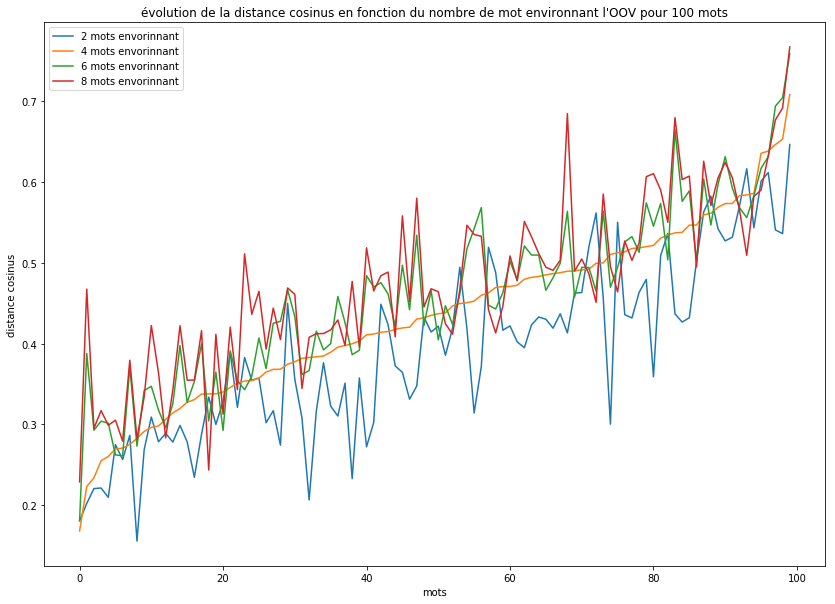

In [24]:
width = 14
height = 14
plt.figure(figsize=(width, height))

df.plot.line(figsize=(14,10))
plt.title("évolution de la distance cosinus en fonction du nombre de mot environnant l'OOV pour 100 mots")
plt.xlabel("mots")
plt.ylabel("distance cosinus")


plt.show()